Data types:
 FL_DATE      datetime64[ns]
DEP_DELAY             int64
ARR_DELAY             int64
AIR_TIME              int64
DISTANCE              int64
DEP_TIME            float64
ARR_TIME            float64
dtype: object
Total records: 1000000

Sample records:
      FL_DATE  DEP_DELAY  ARR_DELAY  AIR_TIME  DISTANCE   DEP_TIME   ARR_TIME
0 2006-01-01          5         19       350      2475   9.083333  12.483334
1 2006-01-02        167        216       343      2475  11.783334  15.766666
2 2006-01-03         -7         -2       344      2475   8.883333  12.133333
3 2006-01-04         -5        -13       331      2475   8.916667  11.950000
4 2006-01-05         -3        -17       321      2475   8.950000  11.883333

Average Departure Delay: 29.89 mins
Average Arrival Delay: 27.96 mins

Average Departure Delay by Dummy Carrier:
 CARRIER
UA    30.036154
WN    29.936737
AS    29.862269
DL    29.859493
AA    29.752701
Name: DEP_DELAY, dtype: float64


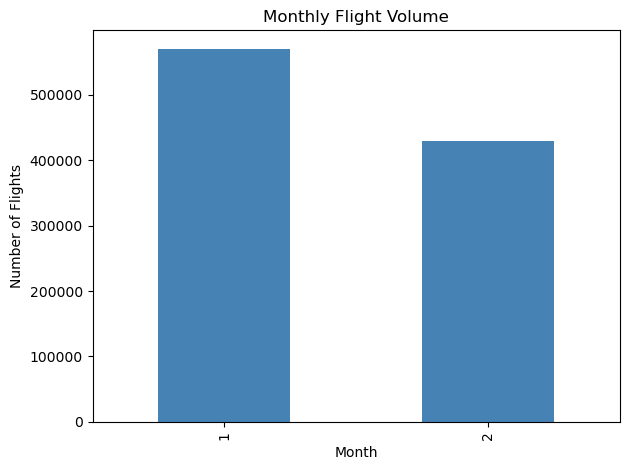

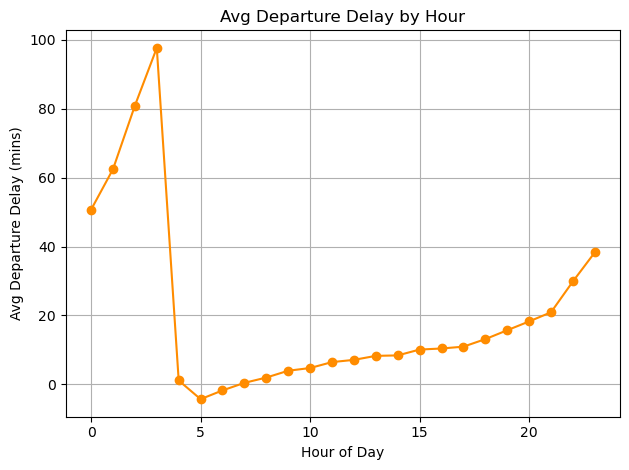

In [5]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 🔹 Load the dataset (CSV format with valid path)
file_path = r"C:\Users\Darshinee\Downloads\flights-1m-parquet.csv"
df = dd.read_csv(file_path)

# 🔸 Convert flight date column to datetime
df['FL_DATE'] = dd.to_datetime(df['FL_DATE'], errors='coerce')

# 🔹 Show basic info
print("Data types:\n", df.dtypes)
print("Total records:", df.shape[0].compute())
print("\nSample records:\n", df.head())

# 🚦 Delay Statistics
delayed = df[df['DEP_DELAY'] > 0]
avg_dep_delay = delayed['DEP_DELAY'].mean().compute()
avg_arr_delay = delayed['ARR_DELAY'].mean().compute()
print(f"\nAverage Departure Delay: {avg_dep_delay:.2f} mins")
print(f"Average Arrival Delay: {avg_arr_delay:.2f} mins")

# ✈️ Add dummy 'CARRIER' column for illustrative grouping
carriers = ['AA', 'DL', 'UA', 'WN', 'AS']
df['CARRIER'] = df.map_partitions(lambda d: np.random.choice(carriers, size=len(d)))

avg_delay_by_carrier = df[df['DEP_DELAY'] > 0].groupby('CARRIER')['DEP_DELAY'].mean().compute().sort_values(ascending=False)
print("\nAverage Departure Delay by Dummy Carrier:\n", avg_delay_by_carrier)

# 📅 Monthly Flight Volume
df['FL_MONTH'] = df['FL_DATE'].dt.month  # Create a new column for the month
monthly_counts = df.groupby('FL_MONTH')['DEP_DELAY'].count().compute()
monthly_counts.plot(kind='bar', color='steelblue', title='Monthly Flight Volume')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

# ⏰ Delay Trend by Hour of Day
df['DEP_HOUR'] = (df['DEP_TIME'] // 1).astype('float64')  # Integer hour from float time
hourly_delay = df.groupby('DEP_HOUR')['DEP_DELAY'].mean().compute()
hourly_delay.plot(kind='line', marker='o', color='darkorange', title='Avg Departure Delay by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Departure Delay (mins)')
plt.grid(True)
plt.tight_layout()
plt.show()
